<a href="https://colab.research.google.com/github/jneey2000/ML/blob/main/4_Binary_Classification_classifying_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
keras.__version__

'2.15.0'

# Classifying movie reviews: a binary classification example

### Two-class classification, or binary classification:
- It may be the most widely applied kind of machine learning problem.  
(Binary Classification: 2종 분류 또는 이진 분류는 아마도 가장 널리 적용된 머신 러닝 문제일 것임)
- In this example, we will learn to classify movie reviews into **"positive" reviews** and **"negative" reviews**, just based on the text content of the reviews.  
(이 예제에서 리뷰 텍스트를 기반으로 영화 리뷰를 긍정과 부정로 분류하는 법을 배움.)


## IMDB 데이터셋

- 인터넷 영화 데이터베이스로부터 가져온 양극단의 리뷰 50,000개로 이루어진 IMDB 데이터셋을 사용  
- 이 데이터셋은 훈련 데이터 25,000개와 테스트 데이터 25,000개로 나뉘어 있고  
각각 50%는 부정, 50%는 긍정 리뷰로 구성되어 있음.

- <font color="orange">**왜 훈련 데이터와 테스트 데이터를 나눌까?**</font>  
=> <U>같은 데이터에서 머신 러닝 모델을 훈련하고 테스트해서는 절대 안 되기 때문임.</U>  
- 모델이 훈련 데이터에서 잘 작동한다는 것이 처음 만난 데이터에서도 잘 동작한다는 것을 보장하지 않음.
- <font color="orange">**일반화 성능 (generalization performance)**</font>: 중요한 것은 새로운 데이터에 대한 모델의 성능임  
(사실 훈련 데이터의 레이블은 이미 알고 있기 때문에 이를 예측하는 모델은 필요하지 않음).   
- 예를 들어 모델이 훈련 샘플과 타깃 사이의 매핑을 모두 외워버릴 수 있음.  
<--과적합(overfitting) 발생  
- 이런 모델은 처음 만나는 데이터에서 타깃을 예측하는 작업에는 쓸모가 없음.

- MNIST 데이터셋처럼 IMDB 데이터셋도 케라스에 포함되어 있음 [Keras-Datasets](https://keras.io/datasets/)  
- **이 데이터는 전처리되어 있어 각 리뷰(단어 시퀀스)가 <U>숫자 시퀀스로 변환</U>되어 있음**
- 여기서 <U><font color="orange">**각 숫자는 사전에 있는 고유한 단어**</font></U>를 나타냄.

다음 코드는 데이터셋을 로드합니다(처음 실행하면 17MB 정도의 데이터가 컴퓨터에 다운로드됩니다):

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #의미 : 가장 빈번하게 등장하는 10000개의 단어만 활용하겠다.

17464789/17464789 [==============================] - 0s 0us/step



- The argument `num_words=10000` means that we will only keep the top 10,000 most frequently occurring words in the training data.  
 **<font color="orange">매개변수 `num_words=10000`</font>은 훈련 데이터에서  
 가장 자주 나타나는 단어 10,000개만 사용하겠다는 의미임.**  
- Rare words will be discarded. This allows us to work with vector data of manageable size.  
 <font color="orange">**드물게 나타나는 단어는 무시함 (오타 제거 가능).**  
 **이렇게 하면 적절한 크기(manageable size)의 벡터 데이터를 얻을 수 있음.**</font>

- The variables `train_data` and `test_data` are lists of reviews, each review being a list of word indices (encoding a sequence of words).   
 **변수 `train_data`와 `test_data`는 리뷰의 목록이고  
 각 리뷰는 단어 인덱스의 리스트임(단어 시퀀스가 인코딩된 것임)**
- `train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive"   
 **`train_labels`와 `test_labels`는 부정을 나타내는 0과 긍정을 나타내는 1의 리스트임**:

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0] #긍정리뷰

1

Since we restricted ourselves to the top 10,000 most frequent words, no word index will exceed 10,000  
(가장 자주 등장하는 단어 10,000개로 제한했기 때문에 단어 인덱스는 10,000을 넘지 않음):

In [ ]:
max([max(sequence) for sequence in train_data])

9999

For kicks, here's how you can quickly decode one of these reviews back to English words  
(리뷰 데이터 하나를 원래 영어 단어로 어떻게 바꾸는지 보겠음):

In [ ]:
# word_index는 단어를 정수 색인에 매핑하는 사전
word_index = imdb.get_word_index()
# 우리는 반대로 정수 인덱스를 단어에 매핑함
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 리뷰를 decode함; 이때 인덱스는 3만큼 오프셋되어 있음
# 0, 1, 2는 "padding", "start of sequence" 및 "unknown"을 위해 예약된 인덱스이기 때문임 #특수 형태 인덱스로 사용됨.
# 실제 단어는 3번부터
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # i-3에 해당하는 단어가 있으면 반환하고, 없으면 '?'로 대체

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

- key값이 없으면 default로 '?'로 받음.

## 데이터 준비

<font color="orange">**신경망에 숫자 리스트를 주입할 수는 없음**</font>   
<U>리스트를 텐서로 바꾸는 두 가지 방법</U>이 있음:

* 같은 길이가 되도록 리스트에 패딩을 추가하고 `(samples, sequence_length)` 크기의 정수 텐서로 변환함.  
그다음 이 정수 텐서를 다룰 수 있는 층을 <font color="orange">**신경망의 첫 번째 층 (`Embedding` layer)으로 사용함**</font>  
(`Embedding` 층을 말하며 나중에 자세히 다룸).  
 **이 방법을 주로 사용함.**
* 리스트를 <font color="orange">**원-핫 인코딩 (One-hot encoding)**</font>하여 0과 1의 벡터로 변환함.  
예를 들면 시퀀스 `[3, 5]`를 인덱스 3과 5의 위치는 1이고 그 외는 모두 0인 10,000차원의 벡터로 각각 변환함.  
그다음 부동 소수 벡터 데이터를 다룰 수 있는 `Dense` 층을 신경망의 첫 번째 층으로 사용함

여기서는 두 번째 방식을 사용하고 이해를 돕기 위해 직접 데이터를 원-핫 벡터로 만듦:

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

    #tool categorical ? 을 사용하면 더 쉽지만, ..

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

Here's what our samples look like now:

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

We should also vectorize our labels, which is straightforward:

In [ ]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Now our data is ready to be fed into a neural network.

## Building our network

- 입력 데이터가 벡터이고 레이블은 스칼라(1 또는 0)임.  
- 아마 앞으로 볼 수 있는 문제 중에서 가장 간단할 것임.  
- 이런 문제에 잘 작동하는 네트워크 종류는 `relu` 활성화 함수를 사용한  
완전 연결 층(즉, `Dense(16, activation='relu')`)을 그냥 쌓은 것임

- `Dense` 층에 전달한 매개변수(16)는 은닉 유닛의 개수임.  
<font color="orange">**하나의 은닉 유닛은 층이 나타내는 표현 공간에서 하나의 차원이 됨**</font>.  
- `relu` 활성화 함수를 사용한 `Dense` 층을 다음과 같은 텐서 연산을 연결하여 구현함

`output = relu(dot(W, input) + b)`

- 16개의 은닉 유닛이 있다는 것은 가중치 행렬 `W`의 크기가 `(input_dimension, 16)`이라는 뜻임.
- i.e. the dot product with `W` will project the input data onto a **16-dimensional representation space** (and then we would add the bias vector `b` and apply the `relu` operation).  
(**입력 데이터와 `W`를 점곱하면 입력 데이터가 16차원으로 표현된 공간으로 투영됨**)
- You can **intuitively understand the dimensionality of your representation space as "how much freedom you are allowing the network to have when learning internal representations".**  
(표현공간의 차원을 <font color="orange">**'신경망이 내재된 표현을 학습할 때 가질 수 있는 자유도'**</font>로 이해할 수 있음)
- Having more hidden units (a higher-dimensional representation space) allows your network to learn more complex representations  
(**은닉 유닛을 늘리면(표현 공간을 더 고차원으로 만들면) 신경망이 더욱 복잡한 표현을 학습할 수 있음**)
- but it makes your network more computationally expensive and may lead to learning unwanted patterns (patterns that will improve performance on the training data but not on the test data).   
(**하지만 계산 비용이 커지고 원하지 안는 패턴을 학습할 수도 있음**)

There are two key architecture decisions to be made about such stack of dense layers:

* <font color="orange">**How many layers to use.  
(얼마나 많은 층을 사용할 것인가?)</font>**
* <font color="orange">**How many "hidden units" to chose for each layer  
(각 층에 얼마나 많은 은닉 유닉을 둘 것인가?)**</font>


We will use the following architecture choice (이 예제에서는 다음과 같은 구조를 사용함) :
* two intermediate layers with 16 hidden units each,  
(16개의 은닉 유닛을 가진 두 개의 은닉층)
* a third layer which will output the scalar prediction regarding the sentiment of the current review.   
(현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 세 번째 층)

* The intermediate layers will use `relu` as their "activation function",  
(중간에 있는 은닉층은 활성화 함수로 `relu`를 사용)
* the final layer will use a **sigmoid activation** so as to output a probability (a score between 0 and 1, indicating how likely the sample is to have the target "1", i.e. how likely the review is to be positive).  
(마지막 층은 확률(0과 1 사이의 점수로, 어떤 샘플이 타깃 '1'일 가능성이 높다는 것은 그 리뷰가 긍정일 가능성이 높다는 것을 의미함)을 출력하기 위해 시그모이드 활성화 함수를 사용함)  


* A `relu` (rectified linear unit) is a function meant to zero-out negative values,  
(**`relu`는 음수를 0으로 만드는 함수임**)
* while a sigmoid "squashes" arbitrary values into the `[0, 1]` interval, thus outputting something that can be interpreted as a probability.  
(**시그모이드는 임의의 값을 [0, 1] 사이로 압축하므로 출력 값을 확률처럼 해석할 수 있음.**)

<div>
<img src="https://drive.google.com/uc?export=view&id=1oyflbZE5F4Dl3Op7INBCC63YSl8S0ise" width="300"/>
</div>

<div>
<img src="https://drive.google.com/uc?export=view&id=1gPxYq21VBX8G1AHN7KI0bVEdxZ8kaa-8" width="300"/>
</div>

<div>
<img src="https://drive.google.com/uc?export=view&id=1zvPucolRyF1icPhzck8Zp6--WzDnDBCn" width="600"/>
</div>


<div>
<img src="https://drive.google.com/uc?export=view&id=18Ga01hvyhVIMaGu271LRPt08TtAI-2Qd" width="300"/>
</div>

""표현공간""
Dense 레이어에 전달된 매개변수 16, 히든노드가 16개라는 의미이다.
히든 노드의 갯수가 16개이고, 16개라는 의미는 총 16차원으로 이루어져 있다는 것이다.
16차원으로 표현된 공간으로 되는 것. 결국에는
은닉층, 히든 레이어 유닛수를 늘린다 -> 표현공간을 고차원으로, capacity를 늘어주는 레이어 수를 늘리거나 노드수를 늘리면,
표현력""" 이라는 것을 많이사용한다.

And here's the Keras implementation, very similar to the MNIST example you saw previously  
(다음은 이 신경망의 케라스 구현임. 이전에 보았던 MNIST 예제와 비슷함):

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #input shape 차원, 10000차원, 빈번한 단어로 제안해서.
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # 바이너리에서는 activation 에서는 sigmoid, 1개여도 상관없다. 클래스 1에 속할 확률로 속하기 때문이다.

#multi class clacification에서는 노드 수 만큼 ... (1,2 참고 꼭!)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


dense : 10000 * 16 + 16
dense_1 : 16 * 16 + 16
dense_2 : 16 * 1 + 1
전부 더하면 학습에 사용할 총 파라미터 수, weight의 갯수

- 마지막으로 **손실 함수와 옵티마이저**를 선택해야 함.
- 이진 분류 문제이고 신경망의 출력이 확률이기 때문에  
(네트워크의 끝에 **시그모이드 활성화 함수**를 사용한 **하나의 유닛**으로 된 층을 놓았음)   
- **`binary_crossentropy` 손실**이 적합함.  
- 이 함수가 유일한 선택은 아니고 예를 들어 `mean_squared_error`를 사용할 수도 있음.  
- 확률을 출력하는 모델을 사용할 때는 크로스엔트로피가 최선의 선택임.  
- **크로스엔트로피는 정보 이론 분야에서 온 개념으로 확률 분포 간의 차이를 측정함**.  
여기에서는 **원본 분포와 예측 분포 차이를 측정**함

- 다음은 `rmsprop` 옵티마이저와 `binary_crossentropy` 손실 함수로 모델을 설정하는 단계임.  
- 훈련하는 동안 정확도를 사용해 모니터링하겠음.

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',#binary classification 이기 때문에.
              metrics=['accuracy']) #특정 지표로는

- 케라스에 `rmsprop`, `binary_crossentropy`, `accuracy`가 포함되어 있기 때문에 옵티마이저, 손실 함수, 측정 지표를 문자열로 지정하는 것이 가능함.  
- 이따금 옵티마이저의 매개변수를 바꾸거나 자신만의 손실 함수, 측정 함수를 전달해야 할 경우가 있음.  
전자의경우에는 옵티마이저 파이썬 클래스를 사용해 객체를 직접 만들어 `optimizer` 매개변수에 전달하면 됨:

In [ ]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

위, 아래 코드가 동일하다. 단, 사용하는 방법이 다르다.

The latter can be done by passing function objects as the `loss` or `metrics` arguments  
(후자의 경우는 `loss`와 `metrics` 매개변수에 함수 객체를 전달하면 됨):

In [ ]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## Validating our approach (훈련 검증)

In order to monitor during training the accuracy of the model on data that it has never seen before, we will create a "validation set" by
setting apart 10,000 samples from the original training data:  
 **훈련하는 동안 처음 본 데이터에 대한 모델의 정확도를 측정하기 위해서는  
 원본 훈련 데이터에서 10,000의 샘플을 떼어서 검증 세트를 만들어야 함**:

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

- 이제 모델을 512개 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련시킴    
(`x_train`과 `y_train` 텐서에 있는 모든 샘플에 대해 20번 반복함).  
- 동시에 따로 떼어 놓은 10,000개의 샘플에서 손실과 정확도를 측정할 것임.  
이렇게 하려면 `validation_data` 매개변수에 검증 데이터를 전달해야 함:

partial_x_train : 실제 입력 데이터
총 몇번 에폭 학습 시킬것인지 등 아래 내용이 중요하다.


In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 73ms/step - loss: 0.4948 - binary_accuracy: 0.7901 - val_loss: 0.3954 - val_binary_accuracy: 0.8365
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2958 - binary_accuracy: 0.8985 - val_loss: 0.3072 - val_binary_accuracy: 0.8812
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2213 - binary_accuracy: 0.9253 - val_loss: 0.2784 - val_binary_accuracy: 0.8909
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1787 - binary_accuracy: 0.9401 - val_loss: 0.2757 - val_binary_accuracy: 0.8904
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1502 - binary_accuracy: 0.9519 - val_loss: 0.2816 - val_binary_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1247 - binary_accuracy: 0.9615 - val_loss: 0.3217 - val_binary_accuracy: 0.8734
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - los

- CPU를 사용해도 에포크마다 2초가 걸리지 않음.  
- 전체 훈련은 20초 이상 걸림.  
- 에포크가 끝날 때마다 10,000개의 검증 샘플 데이터에서 손실과 정확도를 계산하기 때문에 약간씩 지연됨

- `model.fit()` 메서드는 `History` 객체를 반환함
- 이 객체는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리인 `history` 속성을 가지고 있음.  
한 번 확인해 보죠:

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

- 이 딕셔너리는 훈련과 검증하는 동안 모니터링할 측정 지표당 하나씩 모두 네 개의 항목을 담고 있음.  
- 맷플롯립을 사용해 훈련과 검증 데이터에 대한 손실과 정확도를 그려 보겠음:

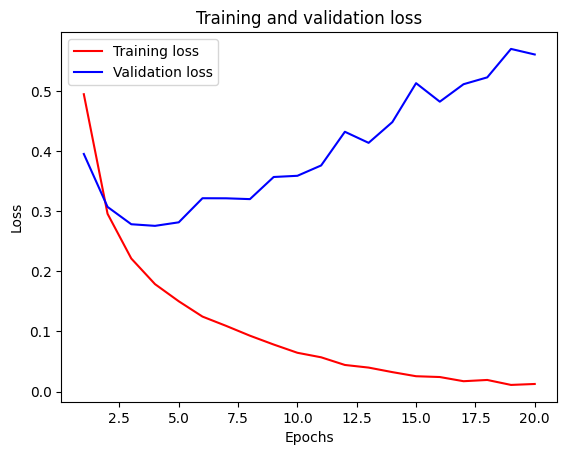

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

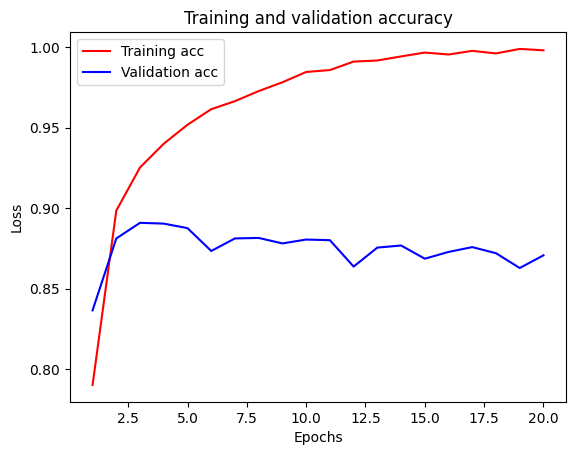

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

- 첫 그래프는 훈련 손실과 검증 손실이고 두번째 그래프는 훈련 정확도와 검증 정확도임.  
- **신경망의 무작위한 초기화 때문에 사람마다 결과가 조금 다를 수 있음.**

- **여기에서 볼 수 있듯이 훈련 손실이 에포크마다 감소하고 훈련 정확도는 에포크마다 증가함.**  
- 경사 하강법 최적화를 사용했을 때 반복마다 최소화되는 것이 손실이므로 기대했던 대로임.  
- 검증 손실과 정확도는 이와 같지 않음.  
4번째 에포크에서 그래프가 역전되는 것 같음.  
이것이 훈련 세트에서 잘 작동하는 모델이 처음 보는 데이터에 잘 작동하지 않을 수 있다고 앞서 언급한 경고의 한 사례임.  
 정확한 용어로 말하면 **과대적합(overfitting)**되었다고 함.
- 2번째 에포크 이후부터 훈련 데이터에 과도하게 최적화되어 **훈련 데이터에 특화된 표현을 학습**하므로  
훈련 세트 이외의 데이터에는 일반화되지 못함.

- **Early Stopping**: 이런 경우에 과대적합을 방지하기 위해서 3번째 에포크 이후에 훈련을 중지할 수 있음.  
- 지금 단계에서는 다루지 않지만, 과대적합을 완화하는 다양한 종류의 기술을 사용할 수 있음.

처음부터 다시 새로운 신경망을 4번의 에포크 동안만 훈련하고 테스트 데이터에서 평가해 보겠음:

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test) #평가할 때는 evaluate 라는 것을 활용한다.
# 이 내용을 잘 기억하세요

Epoch 1/4
49/49 [==============================] - 2s 24ms/step - loss: 0.4594 - accuracy: 0.8141
Epoch 2/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2710 - accuracy: 0.9024
Epoch 3/4
49/49 [==============================] - 1s 22ms/step - loss: 0.2102 - accuracy: 0.9242
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2929 - accuracy: 0.8834


In [ ]:
results #test set

[0.29287663102149963, 0.8834400177001953]

* Our fairly naive approach achieves an accuracy of 88%.  
*With state-of-the-art approaches, one should be able to get close to 95%.

## Using a trained network to generate predictions on new data (훈련된 모델로 새로운 데이터에 대해 예측하기)

After having trained a network, you will want to use it in a practical setting. You can generate the likelihood of reviews being positive
by using the `predict` method  
* 모델을 훈련시킨 후에 이를 실전 환경에서 사용하고 싶을 것임.  
* **predict 메서드**를 사용해서 어떤 리뷰가 긍정일 확률을 예측할 수 있음:

In [ ]:
model.predict(x_test)
#predict - 1클래스에 속할 확률값들이 나온다.
#threshold 0.5 보다 큰지, 작은지

782/782 [==============================] - 2s 2ms/step


array([[0.15947415],
       [0.9997345 ],
       [0.78163254],
       ...,
       [0.08312666],
       [0.05704954],
       [0.4921233 ]], dtype=float32)

* **As you can see, the network is very confident for some samples (0.99 or more, or 0.01 or less)**  
 <font color="orange">**이 모델은 어떤 샘플에 대해 확신을 가짐 (0.99 이상 또는 0.01 이하)**</font>
* **But less confident for others (0.4, 0.6).**  
 <font color="orange">**어떤 샘플에 대해서는 확신이 부족함 (0.4, 0.6)**</font>


## 실습


* We were using 2 hidden layers. Try to use 1 or 3 hidden layers and see how it affects validation and test accuracy.  
(여기에서는 두 개의 은닉층을 사용했지만, 여러분들은 한 개 또는 세 개의 은닉층을 사용하고 검증과 테스트 정확도에 어떤 영향을 미치는지 확인해 보세요.)
* Try to use layers with more hidden units or less hidden units: 32 units, 64 units...  
(층의 은닉 유닛을 추가하거나 줄여 보세요: 32개 유닛, 64개 유닛 등)
* Try to use the `mse` loss function instead of `binary_crossentropy`.  
(binary_crossentropy 대신에 mse 손실 함수를 사용해 보세요.)
* Try to use the `tanh` activation (an activation that was popular in the early days of neural networks) instead of `relu`.  
(relu 대신에 tanh 활성화 함수(초창기 신경망에서 인기 있었던 함수입니다)를 사용해 보세요.)

These experiments will help convince you that the architecture choices we have made are all fairly reasonable, although they can still be
improved!

## 정리

다음은 이 예제에서 배운 것들입니다:

* 원본 데이터를 신경망에 **텐서**로 주입하기 위해서는 꽤 많은 **전처리(preprocessing)가 필요**함.  
* **단어 시퀀스는 이진 벡터로 인코딩될 수 있고 다른 인코딩 방식(token embedding, word embedding)도 있음**.
* `relu` 활성화 함수와 함께 `Dense` 층을 쌓은 네트워크는 (감성 분류를 포함하여) 여러 종류의 문제에 적용할 수 있어서 앞으로 자주 사용하게 될 것임
* (출력 클래스가 두 개인) 이진 분류 문제에서 네트워크는 <font color="orange">**하나의 유닛과 `sigmoid` 활성화 함수를 가진 `Dense` 층으로 끝나야 함**</font>.  
이 **신경망의 출력**은 <U>확률을 나타내는 0과 1 사이의 스칼라 값</U>임  
참고)
    - 출력층이 두개의 유닛이어도 binary classification이 가능은 함  
    - 다만, 출력층을 2개의 유닛으로 사용한다면, softmax와 'categorical_crossentropy'를 사용해서 출력값을 각 클래스에 대한 확률 분포로 뽑아 주어야함. 또한, 정답 레이블도 one-hot encoding형태로 [1, 0] 또는 [0, 1] 형태로 변환해 주어야함.
* 이진 분류 문제에서 이런 스칼라 시그모이드 출력에 대해 사용할 손실 함수는 `binary_crossentropy`임.
* `rmsprop` 옵티마이저는 문제에 상관없이 일반적으로 충분히 좋은 선택임. 최신 최적 옵티마이저 선택 가능
* 훈련 데이터에 대해 성능이 향상됨에 따라 신경망은 과대적합되기 시작하고 이전에 본적 없는 데이터에서는 결과가 점점 나빠지게 됨 (과적합, overfitting 발생).  
 **<font color="orange">항상 훈련 세트 이외의 데이터(validation dataset, 검증데이터)에서 성능을 모니터링해야 함 (학습곡선 (Learning curve))</font>**.

주황색 내용 기억
